In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [2]:
data = pd.read_csv('heart.csv')

In [3]:
A = data[data.target == 1]
B = data[data.target == 0]

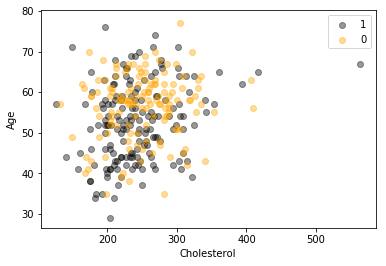

In [4]:
plt.scatter(A.chol,A.age,color = "Black",label="1",alpha=0.4)
plt.scatter(B.chol,B.age,color = "Orange",label="0",alpha=0.4)
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.legend()
plt.show()

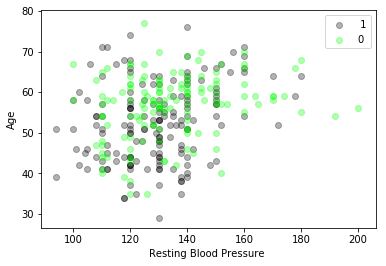

In [5]:
plt.scatter(A.trestbps,A.age,color = "Black",label=" 1",alpha=0.3)
plt.scatter(B.trestbps,B.age,color = "Lime",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Age")
plt.legend()
plt.show()

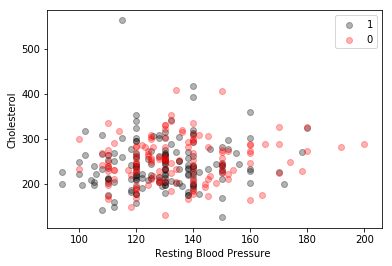

In [6]:
plt.scatter(A.trestbps,A.chol,color = "Black",label="1",alpha=0.3)
plt.scatter(B.trestbps,B.chol,color = "red",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



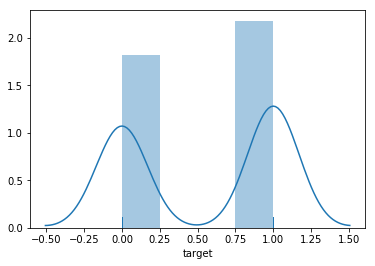

In [7]:
sns.distplot(data['target'],rug=True)
plt.show()

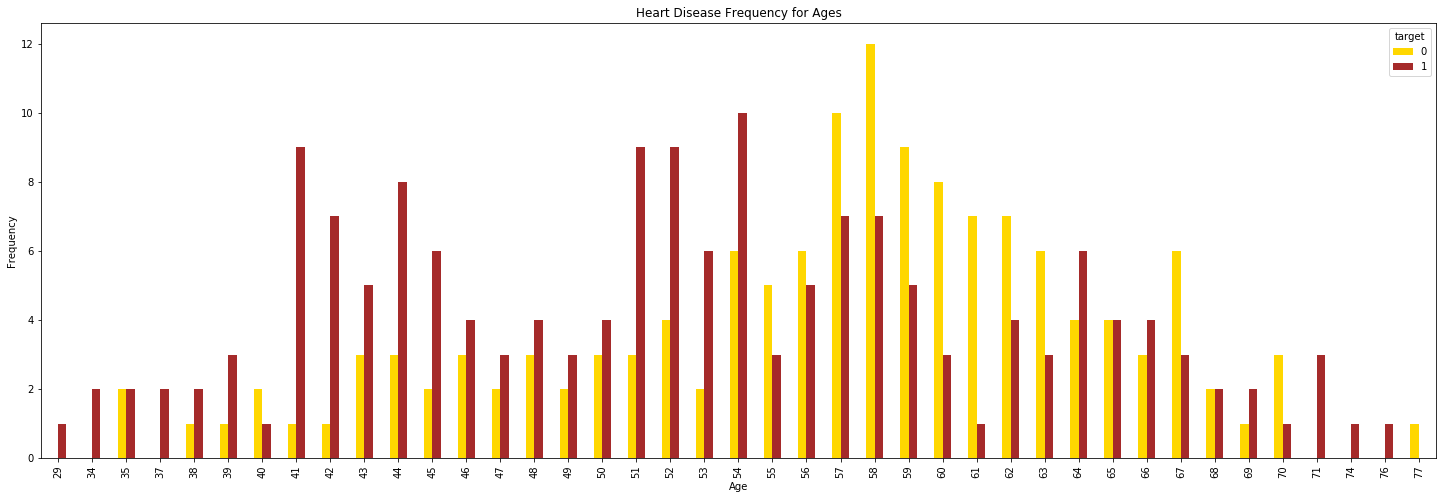

In [8]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

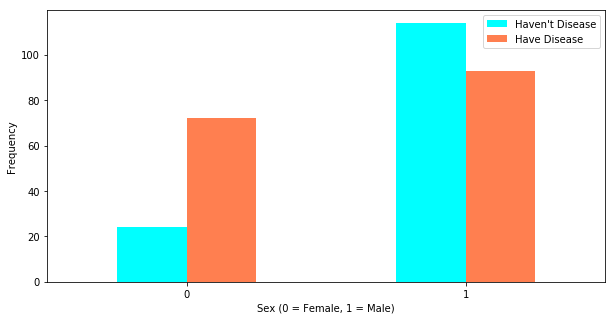

In [9]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

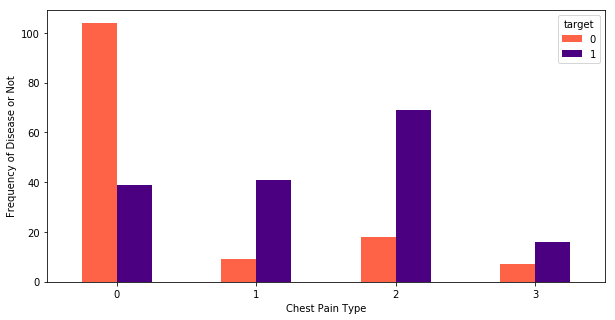

In [24]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

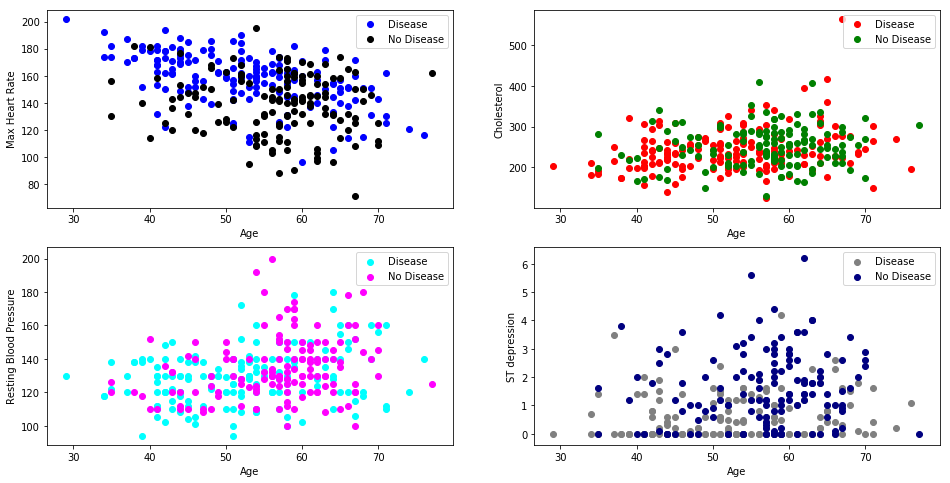

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=data.age[data.target==1],y=data.thalach[data.target==1],c='blue')
plt.scatter(x=data.age[data.target==0],y=data.thalach[data.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=data.age[data.target==1],y=data.chol[data.target==1],c='red')
plt.scatter(x=data.age[data.target==0],y=data.chol[data.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=data.age[data.target==1],y=data.trestbps[data.target==1],c='cyan')
plt.scatter(x=data.age[data.target==0],y=data.trestbps[data.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=data.age[data.target==1],y=data.oldpeak[data.target==1],c='grey')
plt.scatter(x=data.age[data.target==0],y=data.oldpeak[data.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()


In [10]:
#randomFOrest

In [11]:
y =data.target.values
x1=data.drop(["target"],axis=1)

In [12]:
#Normalization 
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

In [13]:
#Split For Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
#transposition
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

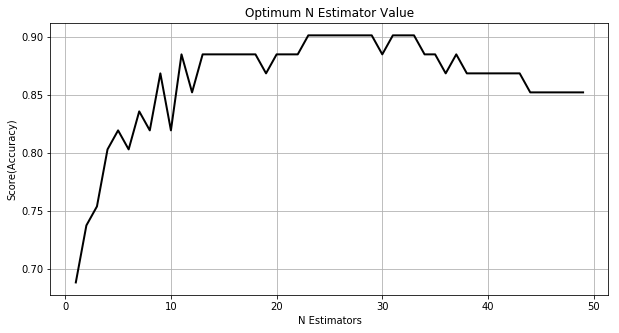

In [15]:
from sklearn.ensemble import RandomForestClassifier
#Find Optimum K value
scores = []
for each in range(1,50):
    RFfind = RandomForestClassifier(n_estimators = each,random_state=5)
    RFfind.fit(xtrain.T,ytrain.T)
    scores.append(RFfind.score(xtest.T,ytest.T))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()


In [17]:
RFfind= RandomForestClassifier(n_estimators = 24, random_state=5) #n_estimator = DT
RFfind.fit(xtrain.T,ytrain.T) # learning
print("Random Forest Score: ",RFfind.score(xtest.T,ytest.T))
RFCscore=RFfind.score(xtest.T,ytest.T)

Random Forest Score:  0.9016393442622951


In [ ]:
#SVM

In [18]:
train = data.drop('target',axis = 1) 
print(train.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, data.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [20]:

from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [21]:

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9010989010989011


In [22]:

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9038461538461539
Recall: 0.9215686274509803
